In [ ]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Read dataset
data=pd.read_csv('BigMart_dataset.zip')

### 1. Assessing and Cleaning the data

In [ ]:
#Look at your data
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
def basic_info(df):
    print("This dataset has ", df.shape[1], " columns and ", df.shape[0], " rows.")
    print("This dataset has ", df[df.duplicated()].shape[0], " duplicated rows.")

    # Total number of missing values in the dataset
    print("This dataset has ", df.isna().sum().sum(), " missing values.")

    # Missing values per column
    print("\nMissing values per column: ")
    print(df.isna().sum())

    print("\nDescriptive statistics of the numeric features in the dataset: ")
    print(df.describe())

    print("\nInformation about this dataset: ")
    print(df.info())

In [ ]:
basic_info(data)

This dataset has  12  columns and  8523  rows.
This dataset has  0  duplicated rows.
This dataset has  3873  missing values.

Missing values per column: 
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Descriptive statistics of the numeric features in the dataset: 
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.29

In [ ]:
data.shape

(8523, 12)

### Assessment report:
Quality issues

* missing values in Outlet_Size, Item_Weight variebels
* string values type (Item_Fat_Content, Item_Type, Outlet_Size Outlet_Location_Type Outlet_Type)
* 2 unique string type (Item_Identifier, outlet_Identifier

### Data cleaning

In [ ]:
# Fill missing values for Item_Weight with the mean
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

# Fill missing values for Outlet_Size with the mode
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
data.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
#after cleaning the data store it and use it
# store the file
#df_copy.reset_index(drop=True)
#df_copy.to_csv('clean_df.csv', index=False)

## Step 2: Exploratory Data Analysis
* Are there any outliers? How will you handle them?
* Are there any useful variables that you can engineer with the given data?
* Do you notice any patterns or anomalies in the data? Can you plot them?

### 1. Are there any outliers? How will you wrangle/handle them?

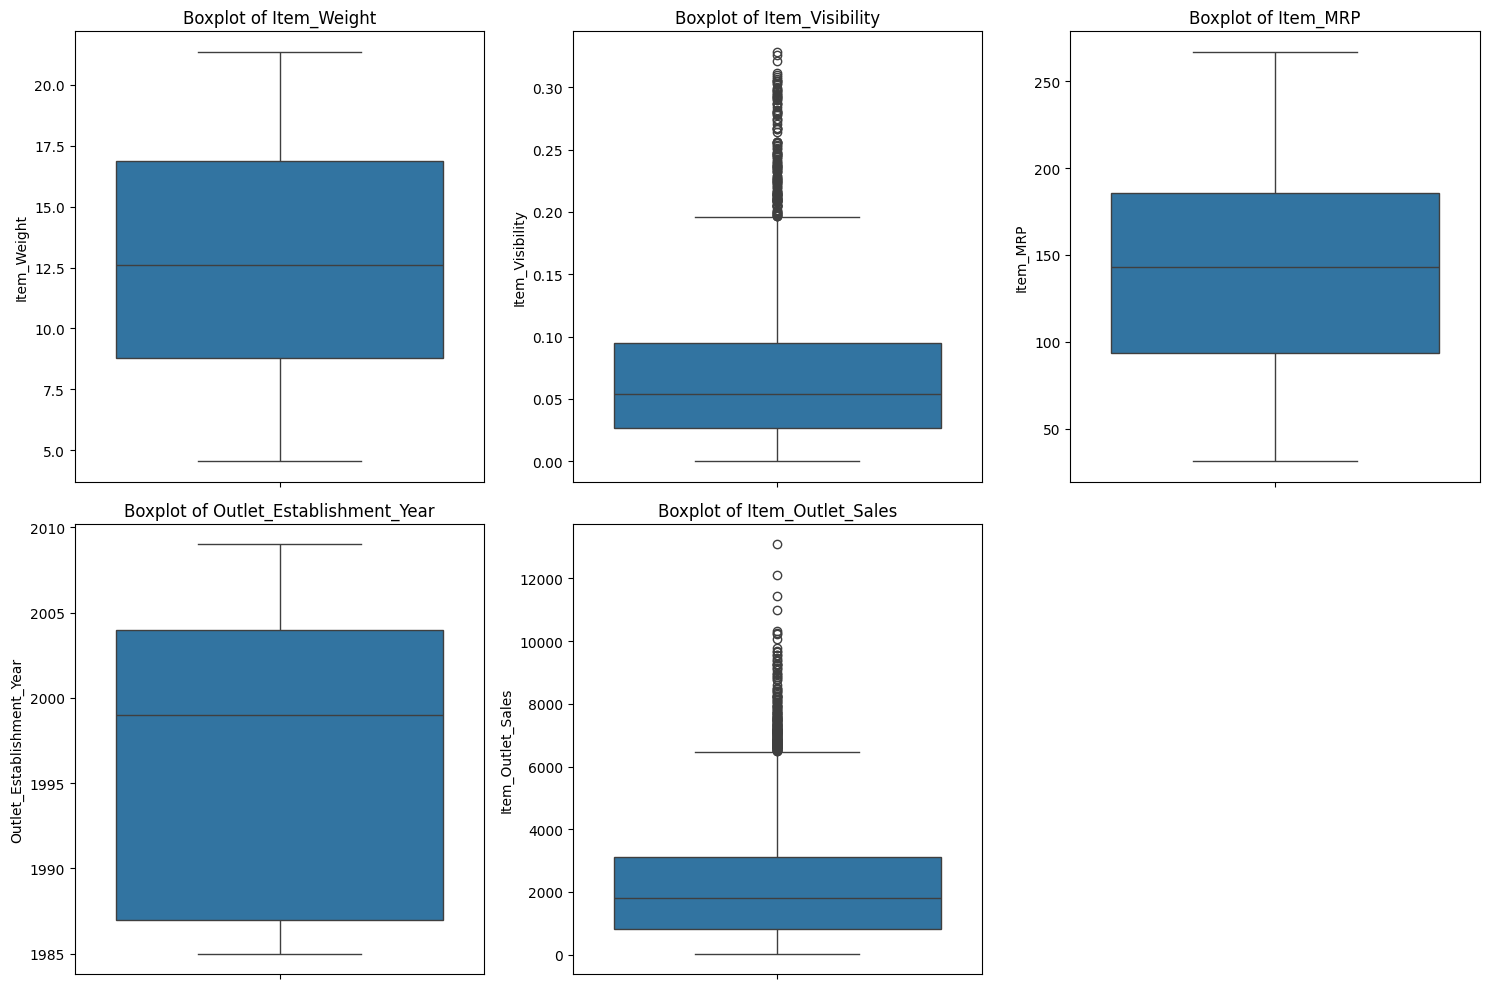

In [ ]:
# Function to plot boxplots for numerical columns, arranged side by side
def plot_boxplots_side_by_side(df, cols_per_row=2):
    # Selecting only numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_cols = len(numerical_cols)

    # Determining number of rows needed
    num_rows = (num_cols + cols_per_row - 1) // cols_per_row

    # Setting the size of the figure
    plt.figure(figsize=(15, num_rows * 5))  # Adjust figure size as needed

    # Creating subplots for each numerical column
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(num_rows, cols_per_row, i)
        sns.boxplot(df[col])
        plt.title(f'Boxplot of {col}')

    plt.tight_layout()  # Adjusts spacing between plots
    plt.show()

# Running the function to visualize outliers side by side
plot_boxplots_side_by_side(data, cols_per_row=3)  # Set how many plots per row (e.g., 3)


### 2. Are there any useful variables that you can engineer with the given data?

The first two letters of Item_Identifier represent a category of the item. You can extract this to create a new feature. For example:
FD: Food
DR: Drinks
NC: Non-consumables

In [ ]:
data['Item_Category'] = data['Item_Identifier'].apply(lambda x: x[:2])

Item_Visibility values vary a lot and may not be straightforward to interpret. You could create bins for this to categorize the visibility into levels like low, medium, and high visibility.

In [ ]:
data['Visibility_Bin'] = pd.qcut(data['Item_Visibility'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

You can calculate the age of the outlet from Outlet_Establishment_Year. This could indicate whether older outlets perform better than newer ones.

In [ ]:
data['Outlet_Age'] = 2024 - data['Outlet_Establishment_Year']

### 3-Do you notice any patterns or anomalies in the data?

Correlation matrices can help detect patterns in relationships between numerical features, especially to identify multicollinearity or unusually weak/strong correlations

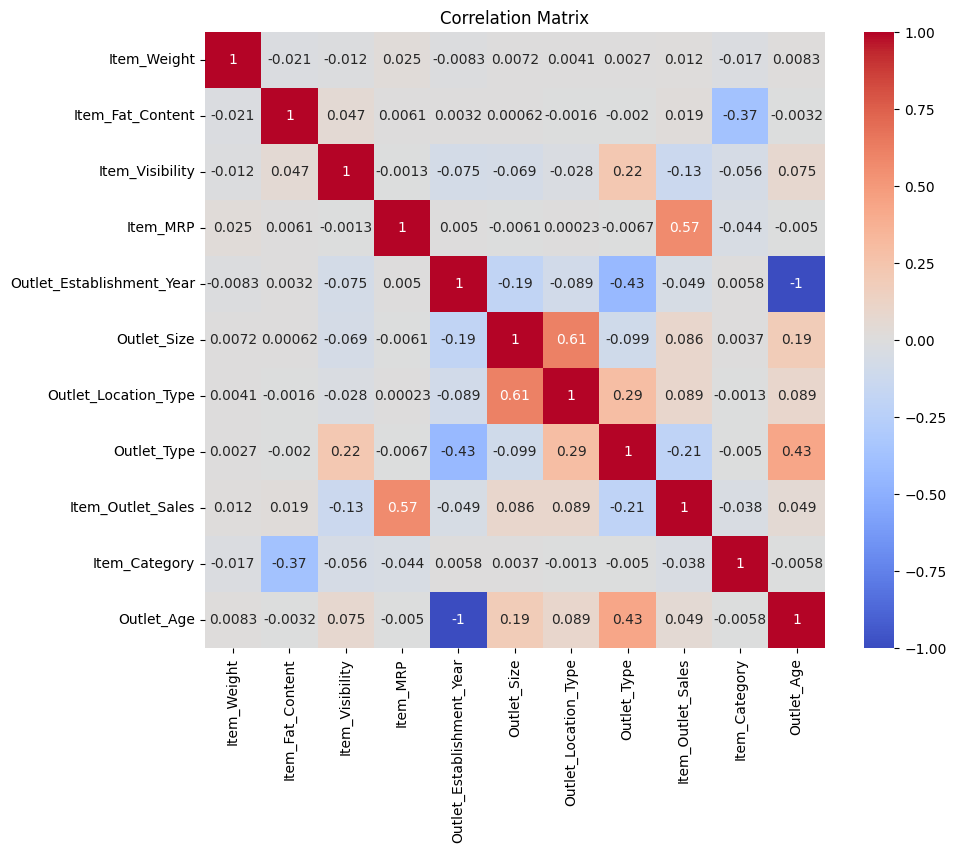

In [ ]:
numerical_coulmns=data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_coulmns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Findings**:

**Patterns**:
* Higher Priced Items

Tend to sell more and bring in more revenue.
Items with a higher price point are clearly driving higher sales.

* Low Visibility Items

Tend to sell better than highly visible ones.
It’s interesting that items not heavily promoted or displayed have stronger sales, which might indicate customers are seeking out these products for specific reasons.

* Older Outlets

The year an outlet was established doesn’t seem to play a major role in sales performance.
Whether an outlet is old or new doesn’t significantly affect how much it sells.

**Anomalies**:
* Item Weight

It’s surprising that the weight of an item has almost no impact on how well it sells or interacts with other variables.
We might have expected heavier or bulkier items to either sell more or less depending on the type of product, but there’s almost no relationship here.

* Outlet Age

Despite intuitively thinking that older outlets might have higher or lower sales due to customer loyalty or operational efficiency, the age of an outlet doesn’t seem to make much of a difference in sales.

## Statistical analysis

### Hypothisis testing


* Item Visibility: Products that are placed more prominently in the store might have higher sales.

* Store Location Type: Stores in urban areas might perform differently from those in rural areas.

* Product Category: Certain product categories, like perishables, might have more volatile sales than non-perishables.

* Outlet age: Older stores might have different sales patterns compared to newer ones.

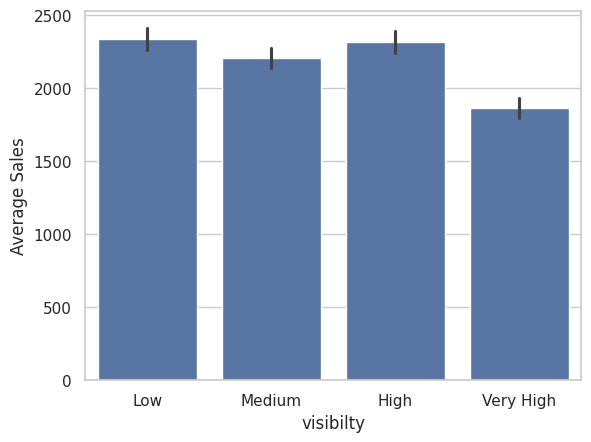

In [ ]:
#first hypothisis
#visul test
sns.barplot(x='Visibility_Bin', y='Item_Outlet_Sales', data=data)
plt.xlabel('visibilty')
plt.ylabel('Average Sales')
plt.show()

In [ ]:
#correlation test
from scipy.stats import pearsonr
correlation, p_value = pearsonr(data['Item_Visibility'], data['Item_Outlet_Sales'])
print(f"Correlation: {correlation}, p-value: {p_value}")

Correlation: -0.12862461222077026, p-value: 9.041287179923291e-33


A low p-value typically < 0.05 suggests that the correlation is statistically significant. While we have a very high value of P this means that they dont have a strong relatioship between them

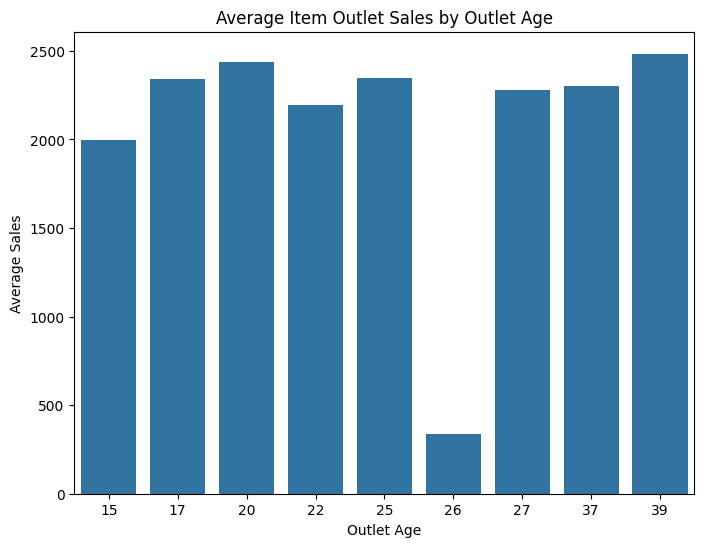

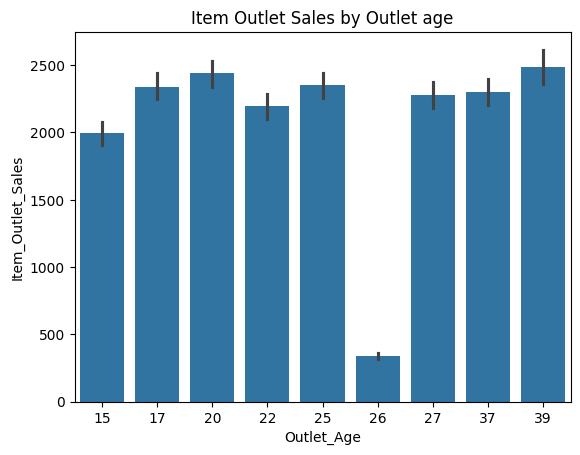

In [ ]:
# Box plot of Item Outlet Sales by Outlet Type
sns.barplot(x='Outlet_Age', y='Item_Outlet_Sales', data=data)
plt.title('Item Outlet Sales by Outlet age')
plt.show()

In [ ]:
#correlation test
from scipy.stats import pearsonr
correlation, p_value = pearsonr(data['Outlet_Age'], data['Item_Outlet_Sales'])
print(f"Correlation: {correlation}, p-value: {p_value}")

Correlation: 0.0491349704408209, p-value: 5.673082108322114e-06


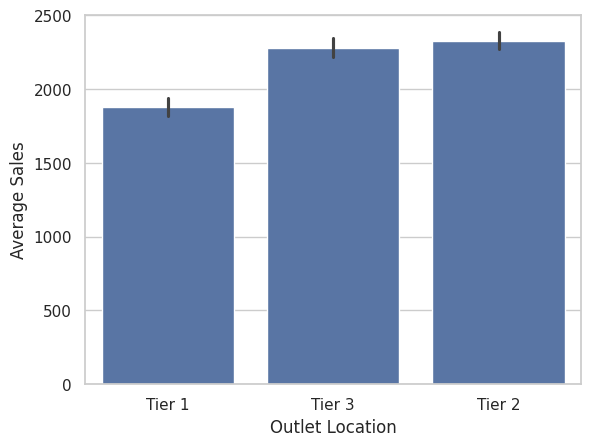

In [ ]:
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data)
plt.xlabel('Outlet Location')
plt.ylabel('Average Sales')
plt.show()

In [ ]:
from scipy.stats import f_oneway
# ANOVA for Store Location Type
tier1_sales = data[data['Outlet_Location_Type'] == 'Tier 1']['Item_Outlet_Sales']
tier2_sales = data[data['Outlet_Location_Type'] == 'Tier 2']['Item_Outlet_Sales']
tier3_sales = data[data['Outlet_Location_Type'] == 'Tier 3']['Item_Outlet_Sales']

f_stat_location, p_value_location = f_oneway(tier1_sales, tier2_sales, tier3_sales)

print("\nANOVA results for Store Location Type:")
print("F-Statistic:", f_stat_location)
print("P-Value:", p_value_location)


ANOVA results for Store Location Type:
F-Statistic: 53.947739874560675
P-Value: 5.2228172988842975e-24


P-Value>0.05, we accept the null hypothis which says there is no siginficant realtionship between these variebels

### Step 4: Data Visualization and Further Analysis
* What item types bring the most sales?
* is larger store bring more sales?


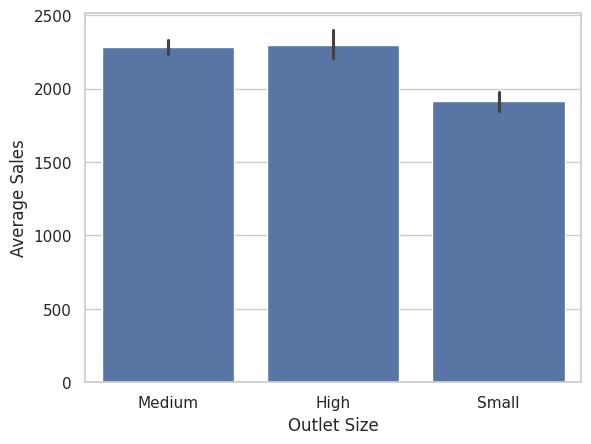

In [ ]:
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data)
plt.xlabel('Outlet Size')
plt.ylabel('Average Sales')
plt.show()

as expected the medium and high outlet size perform better than the small once

### Which type of outlet bring the highest sales

In [ ]:
data.Outlet_Type.value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


Supermarket Type1 brings the highest sales

### What bring more sales reqular or low fat items?

In [ ]:
# Mapping similar values to a consistent format
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})
data.Item_Fat_Content.value_counts()

In [ ]:
data.Item_Fat_Content.value_counts()


,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


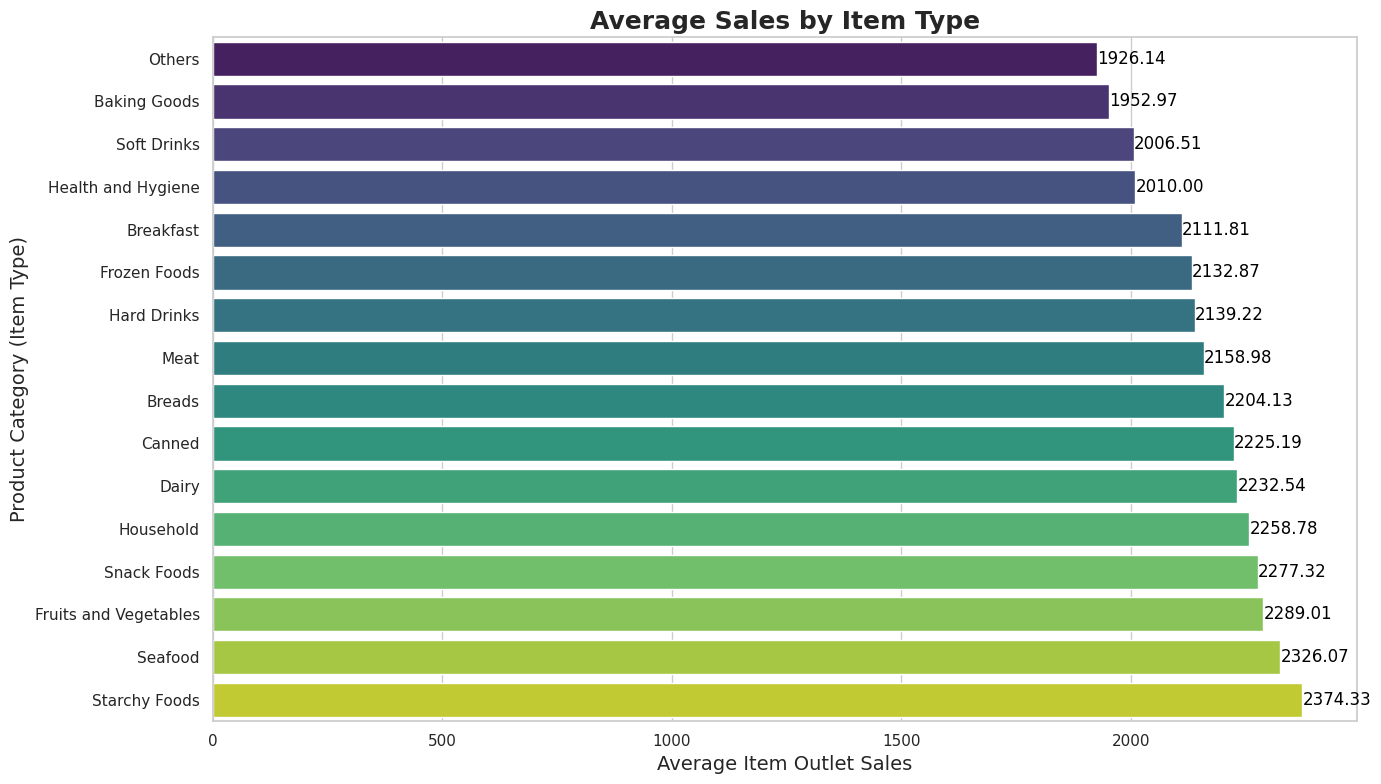

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by Item Type and calculating average sales
avg_sales_by_item_type = data.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values()

# Setting up the plot style
sns.set(style="whitegrid")

# Plotting the results
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x=avg_sales_by_item_type.values, y=avg_sales_by_item_type.index, palette="viridis")

# Adding titles and labels
plt.title('Average Sales by Item Type', fontsize=18, fontweight='bold')
plt.xlabel('Average Item Outlet Sales', fontsize=14)
plt.ylabel('Product Category (Item Type)', fontsize=14)

# Adding the value labels on the bars
for index, value in enumerate(avg_sales_by_item_type.values):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show();


Starchy Foods and sea foods bring the highest sales